# San Antonio City Compensation Data Analysis

In [1]:
## Imports and read CSV

In [2]:
import dataframe_image as dfi

In [3]:
import datetime

In [4]:
import numpy as np

In [5]:
import pandas as pd

#format integers to not print in scientific notaion (for later)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')


In [6]:
import locale

In [7]:
import matplotlib as mpl

In [8]:
#import piplite
#await piplite.install('seaborn')

#format integers to not print in scientific notaion (for later)
import matplotlib.pyplot as plt
plt.ticklabel_format(style='plain')

import seaborn as sns
sns.set_theme(rc={'axes.formatter.limits': (-8, 9)})
%matplotlib inline

In [9]:
comp = pd.read_csv('FY21CityComp_master.csv')

In [10]:
## Data Look 1

In [11]:
comp.head(5)

,first_name,middle_name,last_name,employee_category,hire_date,annual_salaray,base_pay,leave_payout,other_pay,arbitration_&_settlements,overtime,gross_earnings,additional benefits,total_compensation,job_title,business area,gender,ethnic_orgin,employee_subgroup,withdraw_date
0,ERIK,J,WALSH,CIVILIAN,6/6/1994,"312,000.00","312,000.00","12,000.00","27,785.73",0,0,"351,785.73","92,976.08","444,761.81",1022-CITY MANAGER,CITY MANAGER,MALE,HISPANIC OR LATINO,2A CITY MGR FT,NaN
1,ANDREW,NaN,SEGOVIA,CIVILIAN,8/29/2016,"299,625.82","299,625.82","19,446.75","6,396.56",0,0,"325,469.13","66,253.57","391,722.70",1000-CITY ATTORNEY,CITY ATTORNEY,MALE,HISPANIC OR LATINO,2B DEPT DIR FT,NaN
2,SCOTT,VINCENT,BELL,UNIFORM,9/26/1988,"104,664.04","88,889.24","177,027.50","31,446.46",0,"4,004.35","301,367.55","59,119.18","360,486.73",0605-POLICE LIEUTENANT,POLICE,MALE,WHITE (NON HISPANIC OR LATINO),UNIFORM WITHDRAWN,8/20/2021
3,TROY,RAY,TORRES,UNIFORM,10/12/1992,"117,744.12","98,047.62","171,780.52","22,970.99",0,0,"292,799.13","59,070.37","351,869.50",0606-POLICE CAPTAIN,POLICE,MALE,HISPANIC OR LATINO,UNIFORM WITHDRAWN,8/20/2021
4,MARK,STEVEN,TREVINO,UNIFORM,11/27/1993,"96,830.76","94,099.41","5,267.07","29,166.55",0,"147,909.38","276,442.41","64,258.76","340,701.17",0664-DISTRICT FIRE CHIEF,FIRE,MALE,HISPANIC OR LATINO,5A FIRE FULL-TIME,NaN


In [12]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13420 entries, 0 to 13419
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   first_name                 13420 non-null  object
 1   middle_name                5768 non-null   object
 2   last_name                  13420 non-null  object
 3   employee_category          13420 non-null  object
 4   hire_date                  13420 non-null  object
 5   annual_salaray             13420 non-null  object
 6   base_pay                   13420 non-null  object
 7   leave_payout               13420 non-null  object
 8   other_pay                  13420 non-null  object
 9   arbitration_&_settlements  13420 non-null  int64 
 10  overtime                   13420 non-null  object
 11  gross_earnings             13420 non-null  object
 12  additional benefits        13420 non-null  object
 13  total_compensation         13420 non-null  object
 14  job_ti

In [13]:
# Clean the Data

In [14]:
## Misspelling

In [15]:
# additional benefits, business area should have underscores ------->>>> additional_benefits, business_area
#annual_salaray ----> salary

In [16]:
comp['annual_salary'] = comp['annual_salaray']
comp.drop('annual_salaray',axis=1,inplace=True)

In [17]:
comp['additional_benefits'] = comp['additional benefits']
comp.drop('additional benefits',axis=1,inplace=True)

In [18]:
comp['business_area'] = comp['business area']
comp.drop('business area',axis=1,inplace=True)

In [19]:
#Change my co-worker who goes EMERSON

#the line below is how I found out Emersons index number
#comp[(comp['first_name']=='MEGAN') & (comp['last_name'] == 'STANLEY')]
comp.loc[6967,'first_name'] = 'EMERSON'

In [20]:
#Change my co-worker who goes by J.D.

#the line below is how I found out Emersons index number
#comp[(comp['first_name']=='JAMES') & (comp['last_name'] == 'ELIZONDO')]
comp.loc[8098,'first_name'] = 'J.D.'

In [21]:
#Change my co-worker who goes by ANGELINA

#the line below is how I found out Emersons index number
#comp[(comp['first_name']=='ANGELA') & (comp['last_name'] == 'CORTES')]
comp.loc[7456,'first_name'] = 'ANGELINA'

In [22]:
## Datatypes

In [23]:
### Changing strings to integers and fixing some spellings

In [24]:
#these need to be turned into integers
#annyal_salary,base_pay,leave_payout,other_pay,overtime,gross_earnings,additional_benefits,total_compensation,

In [25]:
#get rid of the comas in the strings so that we can convert to float 
comp['annual_salary'] = comp['annual_salary'].str.replace(',','')
#Change str to float
comp['annual_salary'] = comp['annual_salary'].astype(float, copy=None, errors='ignore')

In [26]:
#get rid of the comas in the strings so that we can convert to float 
comp['base_pay'] = comp['base_pay'].str.replace(',','')
#Change str to float
comp['base_pay'] = comp['base_pay'].astype(float, copy=None, errors='ignore')

In [27]:
#get rid of the comas in the strings so that we can convert to float 
comp['leave_payout'] = comp['leave_payout'].str.replace(',','')
#Change str to float
comp['leave_payout'] = comp['leave_payout'].astype(float, copy=None, errors='ignore')

In [28]:
#get rid of the comas in the strings so that we can convert to float 
comp['other_pay'] = comp['other_pay'].str.replace(',','')
#Change str to float
comp['other_pay'] = comp['other_pay'].astype(float, copy=None, errors='ignore')

In [29]:
#get rid of the comas in the strings so that we can convert to float 
comp['overtime'] = comp['overtime'].str.replace(',','')
#Change str to float
comp['overtime'] = comp['overtime'].astype(float, copy=None, errors='ignore')

In [30]:
#get rid of the comas in the strings so that we can convert to float 
comp['gross_earnings'] = comp['gross_earnings'].str.replace(',','')
#Change str to float
comp['gross_earnings'] = comp['gross_earnings'].astype(float, copy=None, errors='ignore')

In [31]:
#get rid of the comas in the strings so that we can convert to float 
comp['additional_benefits'] = comp['additional_benefits'].str.replace(',','')
#Change str to float
comp['additional_benefits'] = comp['additional_benefits'].astype(float, copy=None, errors='ignore')

In [32]:
#get rid of the comas in the strings so that we can convert to float 
comp['total_compensation'] = comp['total_compensation'].str.replace(',','')
#Change str to float
comp['total_compensation'] = comp['total_compensation'].astype(float, copy=None, errors='ignore')

In [33]:
#arbitration_&_settlements is an int where as all our other numbers are floats.
comp['arbitration_&_settlements'] = comp['arbitration_&_settlements'].astype(float, copy=None, errors='ignore')

In [34]:
### Drop columns that are empty

In [35]:
#Every vaule in the a_&_s column is 0
#there must not have been any lawsuits etc.?
comp['arbitration_&_settlements'].value_counts()

0    13420
Name: arbitration_&_settlements, dtype: int64

In [36]:
#so let's drop it.
comp.drop('arbitration_&_settlements',axis=1,inplace=True)

In [37]:
### Change strings to date time

In [38]:
#right now our dates are strings
type(comp['hire_date'][0])

str

In [39]:
#let's convert them to date time objects
comp['hire_date'] = pd.to_datetime(comp['hire_date'], errors='ignore')

In [40]:
comp['withdraw_date'] = pd.to_datetime(comp['withdraw_date'], errors='ignore')

In [41]:
type(comp['hire_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [42]:
### Make a years of service column

In [43]:
timestamp = pd.Timestamp(datetime.datetime(2021, 10, 10))
today = timestamp.today()

In [44]:
today

Timestamp('2023-06-17 15:11:25.597164')

In [45]:
comp['years_service'] = today - comp['hire_date']

In [46]:
comp['years_service'] = comp['years_service'] / np.timedelta64(1, 'Y')


In [47]:
comp['years_service']

0       29.03
1        6.80
2       34.72
3       30.68
4       29.55
         ... 
13415    5.16
13416    5.12
13417    8.22
13418    7.39
13419   14.26
Name: years_service, Length: 13420, dtype: float64

In [48]:
#make sure it is a float or int
type(comp['years_service'][0])

numpy.float64

In [49]:
### Make full name column

In [50]:
cols = ['first_name', 'middle_name', 'last_name']

In [51]:
#let's also make a full name column
comp['full_name'] = comp[cols].apply(lambda x: ' '.join(i for i in x if pd.notna(i)), axis=1)

In [52]:
### Delete job codes in job_title column

In [53]:
#let's adjust the Job title to not contain the '###-'
comp['job_title'] = comp['job_title'].apply(lambda x: x.split('-')[1])

In [54]:
### Combine redundant ethnic_orgin categories

In [55]:
#What are the ethnic origin categories? And how many people fall into them?

comp['ethnic_orgin'].value_counts()

#Some weird things that we need to clean:
#1 Combine the 'HISPANIC OR LATINO' and plain 'HISPANIC' categories 
#2 Combine 'UNKNOWN' and 'OTHER' categories (???)
#3 Combine 'BLACK' and 'BLACK OR AFRICAN AMERICAN'
#4 Combine 'WHITE' and 'WHITE (NON HISPANIC OR LATINO)'

HISPANIC OR LATINO                                    8483
WHITE (NON HISPANIC OR LATINO)                        3593
BLACK OR AFRICAN AMERICAN (NON HISPANIC OR LATINO)     775
TWO OR MORE RACES (NON HISPANIC OR LATINO)             286
ASIAN (NON HISPANIC OR LATINO)                         157
AMERICAN INDIAN OR ALASKA NATIVE (NONHISPANIC/LAT)      55
NATIVE HAWAIIAN/OTHER PACIFIC ISLANDER (NON HIS)        34
HISPANIC                                                19
OTHER                                                   11
WHITE                                                    4
BLACK                                                    2
UNKNOWN                                                  1
Name: ethnic_orgin, dtype: int64

In [56]:
comp['ethnic_orgin'].replace("HISPANIC", "HISPANIC OR LATINO",inplace=True)

In [57]:
comp['ethnic_orgin'].replace("BLACK", "BLACK OR AFRICAN AMERICAN (NON HISPANIC OR LATINO)",inplace=True)

In [58]:
comp['ethnic_orgin'].replace("UNKNOWN", "OTHER",inplace=True)

In [59]:
comp['ethnic_orgin'].replace("WHITE", "WHITE (NON HISPANIC OR LATINO)",inplace=True)

In [60]:
comp['ethnic_orgin'].value_counts()

HISPANIC OR LATINO                                    8502
WHITE (NON HISPANIC OR LATINO)                        3597
BLACK OR AFRICAN AMERICAN (NON HISPANIC OR LATINO)     777
TWO OR MORE RACES (NON HISPANIC OR LATINO)             286
ASIAN (NON HISPANIC OR LATINO)                         157
AMERICAN INDIAN OR ALASKA NATIVE (NONHISPANIC/LAT)      55
NATIVE HAWAIIAN/OTHER PACIFIC ISLANDER (NON HIS)        34
OTHER                                                   12
Name: ethnic_orgin, dtype: int64

In [61]:
### Gender

In [62]:
comp['gender'].value_counts()

MALE       8621
FEMALE     4798
UNKNOWN       1
Name: gender, dtype: int64

In [63]:
### Drop unknown gender

In [64]:
#11938  is our unkown gender index

comp[comp['gender'] == 'UNKNOWN']

,first_name,middle_name,last_name,employee_category,hire_date,base_pay,leave_payout,other_pay,overtime,gross_earnings,...,job_title,gender,ethnic_orgin,employee_subgroup,withdraw_date,annual_salary,additional_benefits,business_area,years_service,full_name
11938,TOMMIE,NaN,LEE,CIVILIAN,2013-10-31,"3,262.80",0.00,0.00,0.00,"3,262.80",...,RECREATION SPECIALIST,UNKNOWN,BLACK OR AFRICAN AMERICAN (NON HISPANIC OR LAT...,4A FULL-TIME,NaT,"16,210.80","9,068.71",PARKS & RECREATION,9.63,TOMMIE LEE


In [65]:
#we need to drop Tommie lee so we can cleanly make dummy variables
comp.drop(11938,axis='index',inplace=True)

In [66]:
### make dummy variable for gender and reasign it column


In [67]:
#make dummy variable for gender and reasign it to comp['gender']
#1 is male
#0 is female
comp['gender'] = pd.get_dummies(comp['gender'])['MALE']

In [68]:
### Make a subset of the database that only contains our numerical data

In [69]:
comp.head(1)

,first_name,middle_name,last_name,employee_category,hire_date,base_pay,leave_payout,other_pay,overtime,gross_earnings,...,job_title,gender,ethnic_orgin,employee_subgroup,withdraw_date,annual_salary,additional_benefits,business_area,years_service,full_name
0,ERIK,J,WALSH,CIVILIAN,1994-06-06,"312,000.00","12,000.00","27,785.73",0.00,"351,785.73",...,CITY MANAGER,1,HISPANIC OR LATINO,2A CITY MGR FT,NaT,"312,000.00","92,976.08",CITY MANAGER,29.03,ERIK J WALSH


In [70]:
just_numbers = comp[['base_pay','leave_payout','other_pay','overtime','gross_earnings','gender','annual_salary','additional_benefits','years_service']]

In [71]:
### Make a subset of the database that only contains numerical data specific to the business area library

In [72]:
comp_library = comp[comp['business_area']=='LIBRARY']

In [73]:
just_numbers_library = comp_library[['base_pay','leave_payout','other_pay',
                                     'overtime','gross_earnings','gender',
                                     'annual_salary','additional_benefits','years_service']]

# Data Look 2

In [74]:
comp.head(5)
dfi.export(comp.head(5),"1_compHeadstyled.png")

In [75]:
comp.head(5)

,first_name,middle_name,last_name,employee_category,hire_date,base_pay,leave_payout,other_pay,overtime,gross_earnings,...,job_title,gender,ethnic_orgin,employee_subgroup,withdraw_date,annual_salary,additional_benefits,business_area,years_service,full_name
0,ERIK,J,WALSH,CIVILIAN,1994-06-06,"312,000.00","12,000.00","27,785.73",0.00,"351,785.73",...,CITY MANAGER,1,HISPANIC OR LATINO,2A CITY MGR FT,NaT,"312,000.00","92,976.08",CITY MANAGER,29.03,ERIK J WALSH
1,ANDREW,NaN,SEGOVIA,CIVILIAN,2016-08-29,"299,625.82","19,446.75","6,396.56",0.00,"325,469.13",...,CITY ATTORNEY,1,HISPANIC OR LATINO,2B DEPT DIR FT,NaT,"299,625.82","66,253.57",CITY ATTORNEY,6.80,ANDREW SEGOVIA
2,SCOTT,VINCENT,BELL,UNIFORM,1988-09-26,"88,889.24","177,027.50","31,446.46","4,004.35","301,367.55",...,POLICE LIEUTENANT,1,WHITE (NON HISPANIC OR LATINO),UNIFORM WITHDRAWN,2021-08-20,"104,664.04","59,119.18",POLICE,34.72,SCOTT VINCENT BELL
3,TROY,RAY,TORRES,UNIFORM,1992-10-12,"98,047.62","171,780.52","22,970.99",0.00,"292,799.13",...,POLICE CAPTAIN,1,HISPANIC OR LATINO,UNIFORM WITHDRAWN,2021-08-20,"117,744.12","59,070.37",POLICE,30.68,TROY RAY TORRES
4,MARK,STEVEN,TREVINO,UNIFORM,1993-11-27,"94,099.41","5,267.07","29,166.55","147,909.38","276,442.41",...,DISTRICT FIRE CHIEF,1,HISPANIC OR LATINO,5A FIRE FULL-TIME,NaT,"96,830.76","64,258.76",FIRE,29.55,MARK STEVEN TREVINO


In [76]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13419 entries, 0 to 13419
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   first_name           13419 non-null  object        
 1   middle_name          5768 non-null   object        
 2   last_name            13419 non-null  object        
 3   employee_category    13419 non-null  object        
 4   hire_date            13419 non-null  datetime64[ns]
 5   base_pay             13419 non-null  float64       
 6   leave_payout         13419 non-null  float64       
 7   other_pay            13419 non-null  float64       
 8   overtime             13419 non-null  float64       
 9   gross_earnings       13419 non-null  float64       
 10  total_compensation   13419 non-null  float64       
 11  job_title            13419 non-null  object        
 12  gender               13419 non-null  uint8         
 13  ethnic_orgin         13419 non-

# Exploratory Data Analysis

#### City employees

In [77]:
# #lets visually looks for corelations. It'd make sense if we have lots of positive 
#     #corelations because most of our categories are types of compensation

# #why do my gender rows and cols look weird?
    
# sns.pairplot(data=just_numbers)
# plt.savefig('1.1_compPairPlot.png',dpi=1200)

#### Library Employees

In [78]:
# #pairplot specific to the library
# sns.pairplot(data=just_numbers_library)
# plt.savefig('1.2_libraryCompPairPlot.png')

### How many employees are in each business area?

In [79]:
num_employees = comp['business_area'].value_counts()

In [80]:
num_employees

POLICE                                  3566
FIRE                                    1923
PARKS & RECREATION                      1198
PUBLIC WORKS                             808
SOLID WASTE MANAGEMENT                   792
LIBRARY                                  520
HEALTH                                   511
AVIATION                                 465
DEVELOPMENT SERVICES                     464
PRE K 4 SA                               463
HUMAN SERVICES                           390
INFORMATION TECHNOLOGY SVCS              324
CONVENTION & SPORTS FACILITIES           315
HUMAN RESOURCES                          304
BUILDING & EQUIPMENT SERVICES            192
MUNICIPAL COURTS                         173
ANIMAL CARE SERVICES                     156
FINANCE                                  148
CENTER CITY DEVELOPMENT & OPERATIONS     141
CITY ATTORNEY                             86
NEIGHBORHOOD & HOUSING SVCS               75
311                                       75
GOVERNMENT

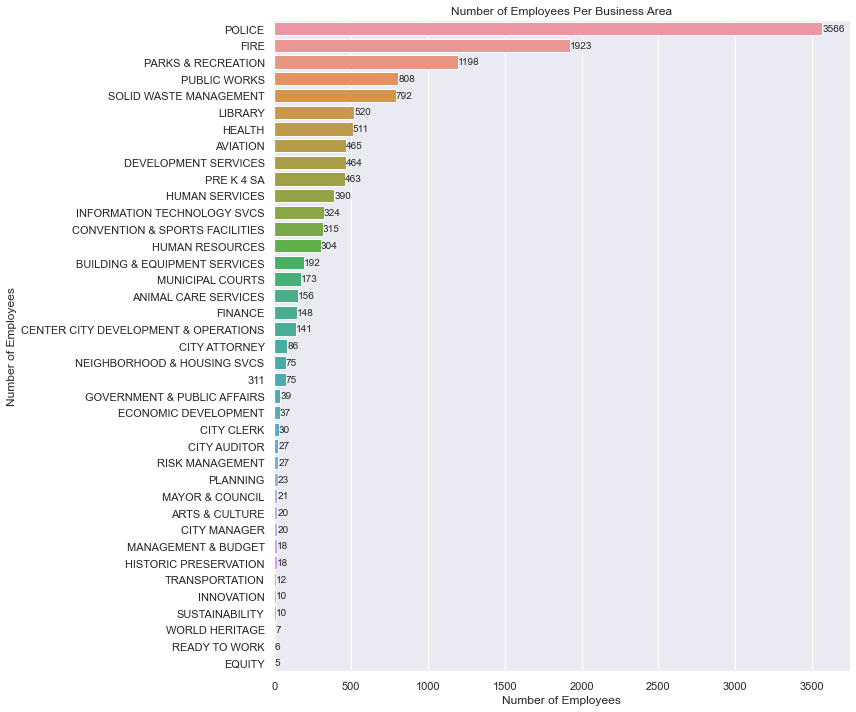

In [81]:
#set up figure
plt.figure(figsize=(12,10))

#set up title and labels
plt.title('Number of Employees Per Business Area')
plt.xlabel('Number of Employees')
plt.ylabel('Number of Employees')

#plot the graph
ax = sns.barplot(y=num_employees.index, x=num_employees.values)

#make it look a little nicer
plt.tight_layout()

#add values to the right of each graph
for i in ax.containers:
    ax.bar_label(i,)
    
plt.savefig('1.3_Number of Employees Per Business Area.png')

### How much does the city spend on total total-compensation?

In [82]:
ba_vs_as = comp.groupby(by='business_area')['total_compensation'].sum().sort_values(ascending=True)

In [83]:
ba_vs_as.sum()

1206680842.68

### What business area spends the most on salaries?

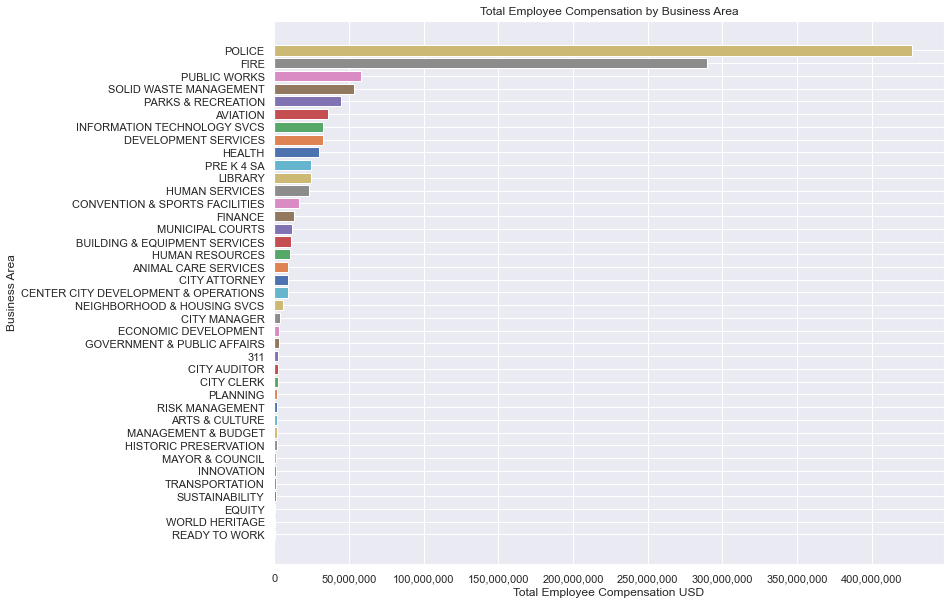

<Figure size 432x288 with 0 Axes>

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

#set x and y
x=ba_vs_as.values
y=ba_vs_as.index

#set label
ylab=list(ba_vs_as.index)

#set the color
my_cmap = sns.color_palette(as_cmap=False)


#plot the graph
plt.barh(y,width=x,color=my_cmap)

#set x and y labels and title
plt.ylabel('Business Area')
plt.xlabel('Total Employee Compensation USD')
plt.title('Total Employee Compensation by Business Area')

#redo y ticks
plt.yticks(ticks=ylab)

#make it look nice and use a thousands seperator
plt.tight_layout
ax.get_xaxis().set_major_formatter(
mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#show the word our plot
plt.show()

plt.savefig('1.4_Total Employee Compensation by Business Area.png')

### What percentage of the cities money goes toward each business areas total compensation?

In [85]:
perc_per_ba = pd.DataFrame(ba_vs_as/ba_vs_as.sum()).sort_values(by='total_compensation',ascending=False)

perc_per_ba = perc_per_ba.style.background_gradient() 
dfi.export(perc_per_ba,"2_perc_per_ba.png")

In [86]:
perc_per_ba

,total_compensation
business_area,
POLICE,0.353710
FIRE,0.240127
PUBLIC WORKS,0.048277
SOLID WASTE MANAGEMENT,0.044389
PARKS & RECREATION,0.036785
AVIATION,0.029692
INFORMATION TECHNOLOGY SVCS,0.027304
DEVELOPMENT SERVICES,0.027126
HEALTH,0.024785


## What are the 20 employees with the highest total compensation, and what is their job title?

In [87]:
top_twenty_employees = comp[['full_name','job_title','total_compensation']].sort_values(
    'total_compensation',ascending=False).head(20)

top_twenty_employees = top_twenty_employees.style.background_gradient() 
dfi.export(top_twenty_employees,"3_top_twenty_employees.png")

In [88]:
top_twenty_employees

,full_name,job_title,total_compensation
0,ERIK J WALSH,CITY MANAGER,444761.810000
1,ANDREW SEGOVIA,CITY ATTORNEY,391722.700000
2,SCOTT VINCENT BELL,POLICE LIEUTENANT,360486.730000
3,TROY RAY TORRES,POLICE CAPTAIN,351869.500000
4,MARK STEVEN TREVINO,DISTRICT FIRE CHIEF,340701.170000
5,STEVE S ALMANZA,POLICE SERGEANT,339582.830000
6,MARIA D VILLAGOMEZ,DEPUTY CITY MANAGER,337116.450000
7,ANTHONY R MURO,DEPUTY CHIEF,321372.080000
8,RANDA GAYL CONNALLY BROWN,FIRE ENGINEER,318801.030000
9,DEAN R REUTER,POLICE SERGEANT,315360.250000


## What business area has the average highest annual salary per employee?

In [89]:
# to do that we will need the info from the two questions above

comp_per_empl = (comp.groupby(by='business_area')['annual_salary'].sum()/comp['business_area']
 .value_counts()).sort_values(ascending=False).round(2)

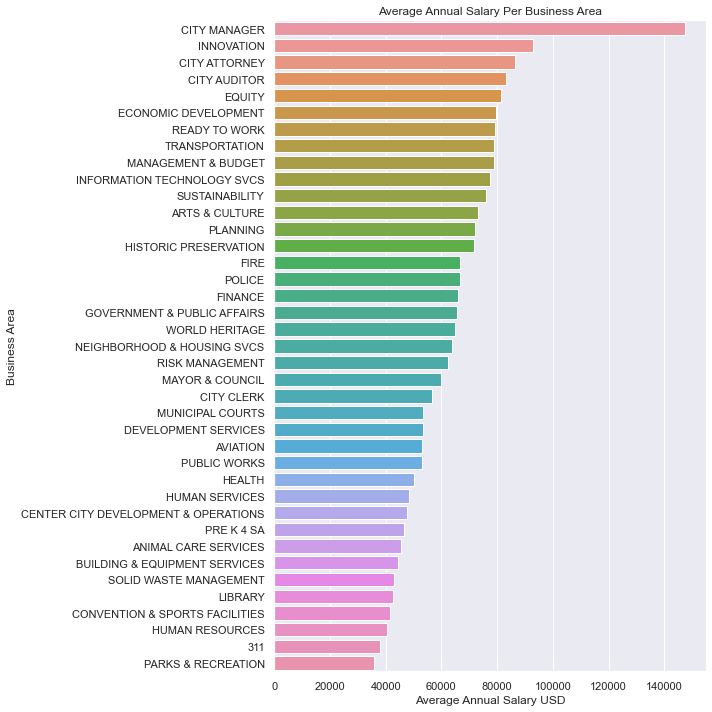

In [90]:
#set up figure
plt.figure(figsize=(10,10))

#set title and lables
plt.title('Average Annual Salary Per Business Area')
plt.xlabel('Average Annual Salary USD')
plt.ylabel('Business Area')

#plot
sns.barplot(y=comp_per_empl.index, x=comp_per_empl.values)

#make it look nice
plt.tight_layout()

plt.savefig('3.1_Average Annual Salary Per Business Area.png')

## What are the best and worst jobs by annual salary?

#### How many unique jobs are there?

In [91]:
comp['job_title'].nunique()

847

In [92]:
#what are the the top 50 jobs with the highest total compensation?
best_jobs = pd.DataFrame(comp.groupby('job_title')['total_compensation'].mean().sort_values(ascending=False).head(50))
best_jobs = best_jobs.style.background_gradient() 
dfi.export(best_jobs,"4_best_jobs.png")

#### Best Paying Jobs

In [93]:
best_jobs

,total_compensation
job_title,
CITY MANAGER,444761.810000
CITY ATTORNEY,391722.700000
DEPUTY CITY MANAGER,337116.450000
CHIEF FINANCIAL OFFICER,308909.140000
POLICE CHIEF,304591.010000
FIRE CHIEF,303631.430000
CHIEF INFORMATION OFFICER,296039.760000
ASSISTANT CITY MANAGER,288128.188571
FINANCE DIRECTOR,280239.370000


In [94]:
#what are the the lowest 20 jobs with the lowest average salary? 
worst_jobs = pd.DataFrame(comp.groupby('job_title')['total_compensation'].mean().sort_values().head(50))
worst_jobs = worst_jobs.style.background_gradient() 
dfi.export(worst_jobs,"5_worst_jobs.png")

#### Worst Paying Jobs

In [95]:
worst_jobs

,total_compensation
job_title,
FIREFIGHTER TRAINEE,171.910000
STUDENT INTERN III,1376.570000
TEMPORARY SUMMER EMPLOYEE,2327.212857
PLUMBER ASSISTANT,2446.430000
PUBLIC SERVICE ATTENDANT,2743.325479
RECREATION ASSISTANT,2967.320807
LIFEGUARD,3870.556947
SWIMMING POOL SUPERVISOR,5113.051500
PUBLIC HEALTH DENTIST,5471.380000


## Are there any trends in hire date or termination date?

In [96]:
comp['withdraw_month'] = comp['withdraw_date'].apply(lambda x: x.month)

In [97]:
#lets make a sub data base of the employees who were let go, that way we don't have to deal with NaNs

In [98]:
let_go = comp[~comp['withdraw_month'].isna()]

In [99]:
let_go['withdraw_month'] = let_go['withdraw_month'].apply(lambda x:str(int(x)))

C:\Users\dansc\AppData\Local\Temp\ipykernel_9936\2398343627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  let_go['withdraw_month'] = let_go['withdraw_month'].apply(lambda x:str(int(x)))


In [100]:
month = {	'1':'January',
		'2':'February',
		'3':'March',
		'4':'April',
		'5':'May',
		'6':'June',
		'7':'July',
		'8':'August',
		'9':'September',
		'10':'October',
		'11':'November',
		'12':'December'		}

In [101]:
let_go['withdraw_month'] = let_go['withdraw_month'].map(month)

C:\Users\dansc\AppData\Local\Temp\ipykernel_9936\396516167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  let_go['withdraw_month'] = let_go['withdraw_month'].map(month)


In [102]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

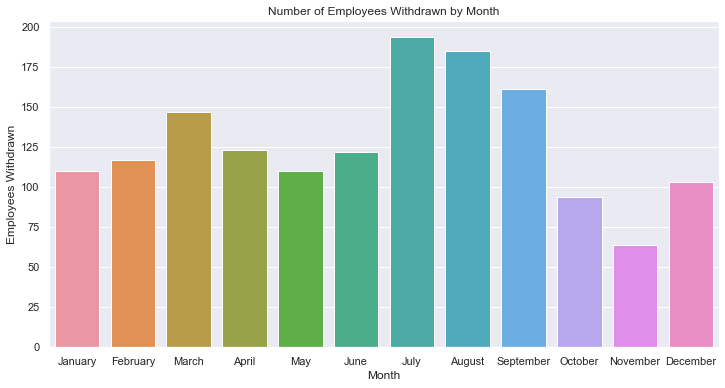

<Figure size 432x288 with 0 Axes>

In [103]:
#set up the figure
plt.figure(figsize=(12,6))
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

#plot
sns.countplot(data=let_go,x='withdraw_month',order=month_order)

#labels and title
plt.ylabel('Employees Withdrawn')
plt.xlabel('Month')
plt.title('Number of Employees Withdrawn by Month')

#show
plt.show()

plt.savefig('5.1_Number of Employees Withdrawn by Month.png')

## What were the ethnic orgins of the employees let go? And how does that compare to the percentage of that ethnic group in the city? 

#### Total employees let go

In [104]:
#total employees let go
let_go['first_name'].count()

1530

In [105]:
#employees let go count by ethnicity
empLetGo_ByEthnicity = pd.DataFrame(let_go.groupby('ethnic_orgin').count()['first_name'])

empLetGo_ByEthnicity = empLetGo_ByEthnicity.style.background_gradient() 
dfi.export(empLetGo_ByEthnicity,"6_empLetGo_ByEthnicity.png")


In [106]:
#### Total employ

In [107]:
empLetGo_ByEthnicity

,first_name
ethnic_orgin,
AMERICAN INDIAN OR ALASKA NATIVE (NONHISPANIC/LAT),6
ASIAN (NON HISPANIC OR LATINO),19
BLACK OR AFRICAN AMERICAN (NON HISPANIC OR LATINO),123
HISPANIC OR LATINO,987
NATIVE HAWAIIAN/OTHER PACIFIC ISLANDER (NON HIS),3
OTHER,1
TWO OR MORE RACES (NON HISPANIC OR LATINO),54
WHITE (NON HISPANIC OR LATINO),337


In [108]:
#Total employees count by ethnicity
totalEmp_byEthnicity = pd.DataFrame(comp.groupby('ethnic_orgin').count()['first_name'])

totalEmp_byEthnicity = totalEmp_byEthnicity.style.background_gradient() 
dfi.export(totalEmp_byEthnicity,"7_totalEmp_byEthnicity.png")


In [109]:
totalEmp_byEthnicity

,first_name
ethnic_orgin,
AMERICAN INDIAN OR ALASKA NATIVE (NONHISPANIC/LAT),55
ASIAN (NON HISPANIC OR LATINO),157
BLACK OR AFRICAN AMERICAN (NON HISPANIC OR LATINO),776
HISPANIC OR LATINO,8502
NATIVE HAWAIIAN/OTHER PACIFIC ISLANDER (NON HIS),34
OTHER,12
TWO OR MORE RACES (NON HISPANIC OR LATINO),286
WHITE (NON HISPANIC OR LATINO),3597


In [110]:
#Percentage of employees let go by ethnicity
p_letgo_be = let_go.groupby('ethnic_orgin').count()['first_name']/let_go['first_name'].count()

In [111]:
p_letgo_be

ethnic_orgin
AMERICAN INDIAN OR ALASKA NATIVE (NONHISPANIC/LAT)   0.00
ASIAN (NON HISPANIC OR LATINO)                       0.01
BLACK OR AFRICAN AMERICAN (NON HISPANIC OR LATINO)   0.08
HISPANIC OR LATINO                                   0.65
NATIVE HAWAIIAN/OTHER PACIFIC ISLANDER (NON HIS)     0.00
OTHER                                                0.00
TWO OR MORE RACES (NON HISPANIC OR LATINO)           0.04
WHITE (NON HISPANIC OR LATINO)                       0.22
Name: first_name, dtype: float64

In [112]:
#total employees
comp['first_name'].count()

13419

In [113]:
#employee count by ethnicity
emp_ByEthnicity = pd.DataFrame(comp.groupby('ethnic_orgin').count()['first_name'])
emp_ByEthnicity = emp_ByEthnicity.style.background_gradient() 
dfi.export(emp_ByEthnicity,"8_emp_ByEthnicity.png")

In [114]:
emp_ByEthnicity

,first_name
ethnic_orgin,
AMERICAN INDIAN OR ALASKA NATIVE (NONHISPANIC/LAT),55
ASIAN (NON HISPANIC OR LATINO),157
BLACK OR AFRICAN AMERICAN (NON HISPANIC OR LATINO),776
HISPANIC OR LATINO,8502
NATIVE HAWAIIAN/OTHER PACIFIC ISLANDER (NON HIS),34
OTHER,12
TWO OR MORE RACES (NON HISPANIC OR LATINO),286
WHITE (NON HISPANIC OR LATINO),3597


In [115]:
#percentage of employees total by ethnicity
p_total_be = comp.groupby('ethnic_orgin').count()['first_name']/comp['first_name'].count()

In [116]:
p_total_be

ethnic_orgin
AMERICAN INDIAN OR ALASKA NATIVE (NONHISPANIC/LAT)   0.00
ASIAN (NON HISPANIC OR LATINO)                       0.01
BLACK OR AFRICAN AMERICAN (NON HISPANIC OR LATINO)   0.06
HISPANIC OR LATINO                                   0.63
NATIVE HAWAIIAN/OTHER PACIFIC ISLANDER (NON HIS)     0.00
OTHER                                                0.00
TWO OR MORE RACES (NON HISPANIC OR LATINO)           0.02
WHITE (NON HISPANIC OR LATINO)                       0.27
Name: first_name, dtype: float64

In [117]:
len(p_total_be)

8

In [118]:
len(p_total_be.index)

8

In [119]:
list(p_total_be.index)

['AMERICAN INDIAN OR ALASKA NATIVE (NONHISPANIC/LAT)',
 'ASIAN (NON HISPANIC OR LATINO)',
 'BLACK OR AFRICAN AMERICAN (NON HISPANIC OR LATINO)',
 'HISPANIC OR LATINO',
 'NATIVE HAWAIIAN/OTHER PACIFIC ISLANDER (NON HIS)',
 'OTHER',
 'TWO OR MORE RACES (NON HISPANIC OR LATINO)',
 'WHITE (NON HISPANIC OR LATINO)']

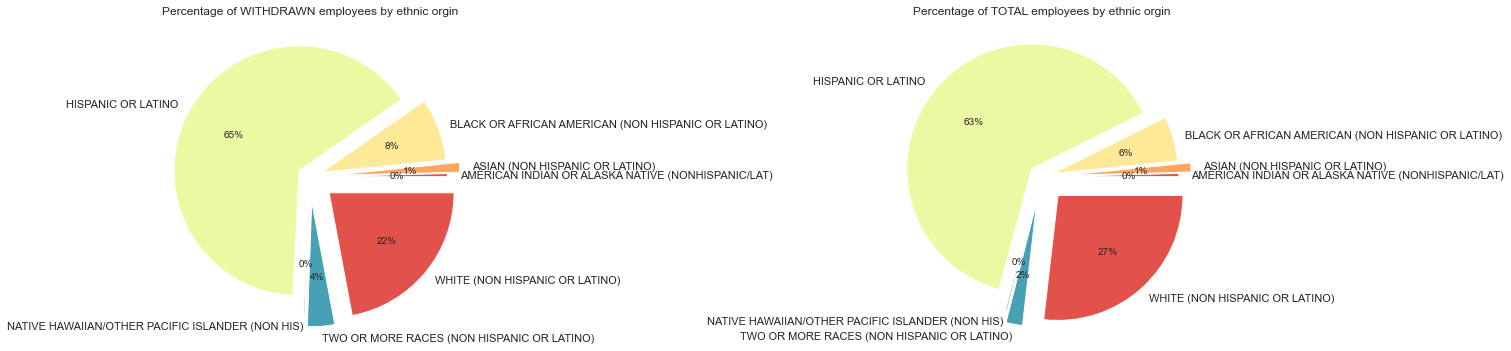

In [120]:
#ax1,ax2 set up 2 two pies
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,20)) #ax1,ax2 refer to your two pies

#set colors and explode
colors = sns.color_palette('Spectral')[0:8]
explode = [0.1, 0.2, 0.1, 0.1, 0.1,0.2,0.2]

#--------------------------------------WITHDRAWN PIE #1-----------------------------
#set variables and title
x = p_letgo_be.drop('OTHER')
labels = list(p_letgo_be.drop('OTHER').index)
ax1.title.set_text('Percentage of WITHDRAWN employees by ethnic orgin')

#plot
ax1.pie(x,labels=labels,explode=explode,colors=colors,autopct='%.0f%%')

#make look nice
fig.autofmt_xdate()
plt.tight_layout()

#---------------------------------------TOTAL PIE #2----------------------------------
#set variables and title
x = p_total_be.drop('OTHER')
labels = list(p_total_be.drop('OTHER').index)
ax2.title.set_text('Percentage of TOTAL employees by ethnic orgin')

#plot
ax2.pie(x,labels=labels,colors=colors,autopct='%.0f%%',explode=explode)

#make look nice
fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('8.1_Total vs Withdrawn by ethntic orgin PIE.png')

## Who are the top 20 earners in the library Business Area

In [121]:
#To avoid duplicate names (there is a patricia perez also in parks and rec and as a enforcement officer)
#let's make a splice of the database that is just library workers.

library_comp = comp[comp['business_area'] == 'LIBRARY']

In [122]:
top_20_library = library_comp[['full_name','job_title','annual_salary']].sort_values(
    'annual_salary', ascending=False).head(20)
top_20_library = top_20_library.style.background_gradient() 
dfi.export(top_20_library,"9_top_20_library.png")

In [123]:
top_20_library

,full_name,job_title,annual_salary
68,RAMIRO S. SALAZAR,LIBRARY DIRECTOR,188549.140000
636,KATHLEEN ELAINE DONELLAN,ASSISTANT LIBRARY DIRECTOR,138084.180000
618,DALE MCNEILL,ASST LIBRARY DIRECTOR,137397.000000
3323,RICH WALKER,PROJECT CONTROL MANAGER,106247.960000
3511,RAYMOND FRAGA,SPECIAL PROJECTS MANAGER,100756.240000
4018,CHERYL LYNN SHEEHAN,PUBLIC SERVICES ADMINISTRATOR,94043.820000
4298,GABRIELLA RAUSCHUBER,DEPARTMENT FISCAL ADMINISTRATOR,91571.220000
4294,JENNIFER JOAN VELASQUEZ,LIBRARY SERVICES MANAGER,91098.540000
4771,KATHRYN W STURTZ,LIBRARY SERVICES MANAGER,91098.540000
4333,JESSICA ELIZABETH ZURITA,EXECUTIVE ASSISTANT,89739.260000


### What employees in the refernce department worked for SAPL in 2021 and what was their total compensation?

In [124]:
#To avoid duplicate names (there is a patricia perez also in parks and rec and as a enforcement officer)
#let's make a splice of the database that is just library workers.

library_comp = comp[comp['business_area'] == 'LIBRARY']

In [125]:
#since I don't know all my co workers middle names...
#first step would be to make a first_last variable combigning employees first and last name
library_comp['first_last'] = library_comp['first_name'] + ' ' + library_comp['last_name']

C:\Users\dansc\AppData\Local\Temp\ipykernel_9936\2910186126.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  library_comp['first_last'] = library_comp['first_name'] + ' ' + library_comp['last_name']


In [126]:
#list of employees I work with
reference_employees = ['ARLAND SCHNACKER','BETTINA HERNANDEZ','CHRISTINA MONTERO',
                       'CYNTHIA DELION',' DAN SCHUMACHER','DAVID GALLIN-PARISI',
                       'EMERSON STANLEY','J.D. ELIZONDO','JORDAN TORRES',
                       'JOSHUA YURCHESHEN','JULIA SELWYN','LETICIA GUERRA',
                       'MELISSA GOMEZ','MICHELLE VILLARREAL','PANNAGA PRASAD',
                       'PATRICIA PEREZ','RAQUEL REYES','SALLY BAUER',
                       'SARA DE LA ROSA','STACEY MARTINEZ','VALERIE SAUCEDA',
                       'BRIANNA GLASS','ANGELINA CORTES'
                      ]

In [127]:
#There are 21 employees
len(reference_employees)

23

In [128]:
#11 of them were found in the database
library_comp['first_last'].isin(values=reference_employees).value_counts()

False    504
True      16
Name: first_last, dtype: int64

In [129]:
reference_dep = library_comp.loc[library_comp['first_last'].isin(reference_employees)]

In [130]:
#Why did Leticia get paid so little?

#it's not her hire date she was hired in july? I'll ask her.
library_comp[(library_comp['first_last']=='LETICIA GUERRA')]['hire_date']

12778   2021-07-10
Name: hire_date, dtype: datetime64[ns]

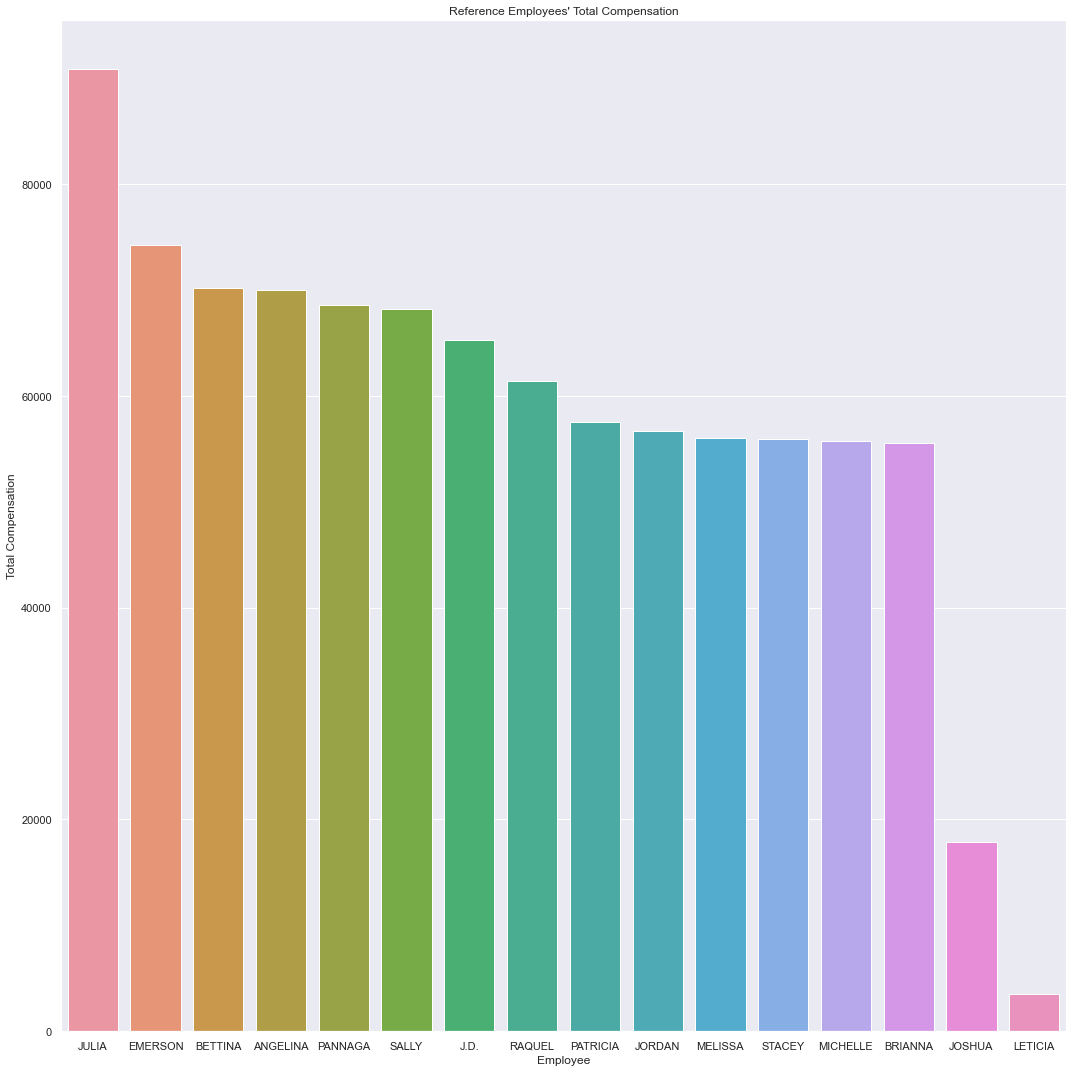

In [131]:
#set up the figure
plt.figure(figsize=(15,15))

#plot
sns.barplot(data = reference_dep[['first_name','total_compensation']],x='first_name',y='total_compensation')

#set labels and title
plt.xlabel('Employee')
plt.ylabel('Total Compensation')
plt.title("Reference Employees' Total Compensation")

#make look nice
plt.tight_layout()
plt.savefig('9.1_Reference Employees Total Compensation.png')

### How does this graph compare to year's worked?

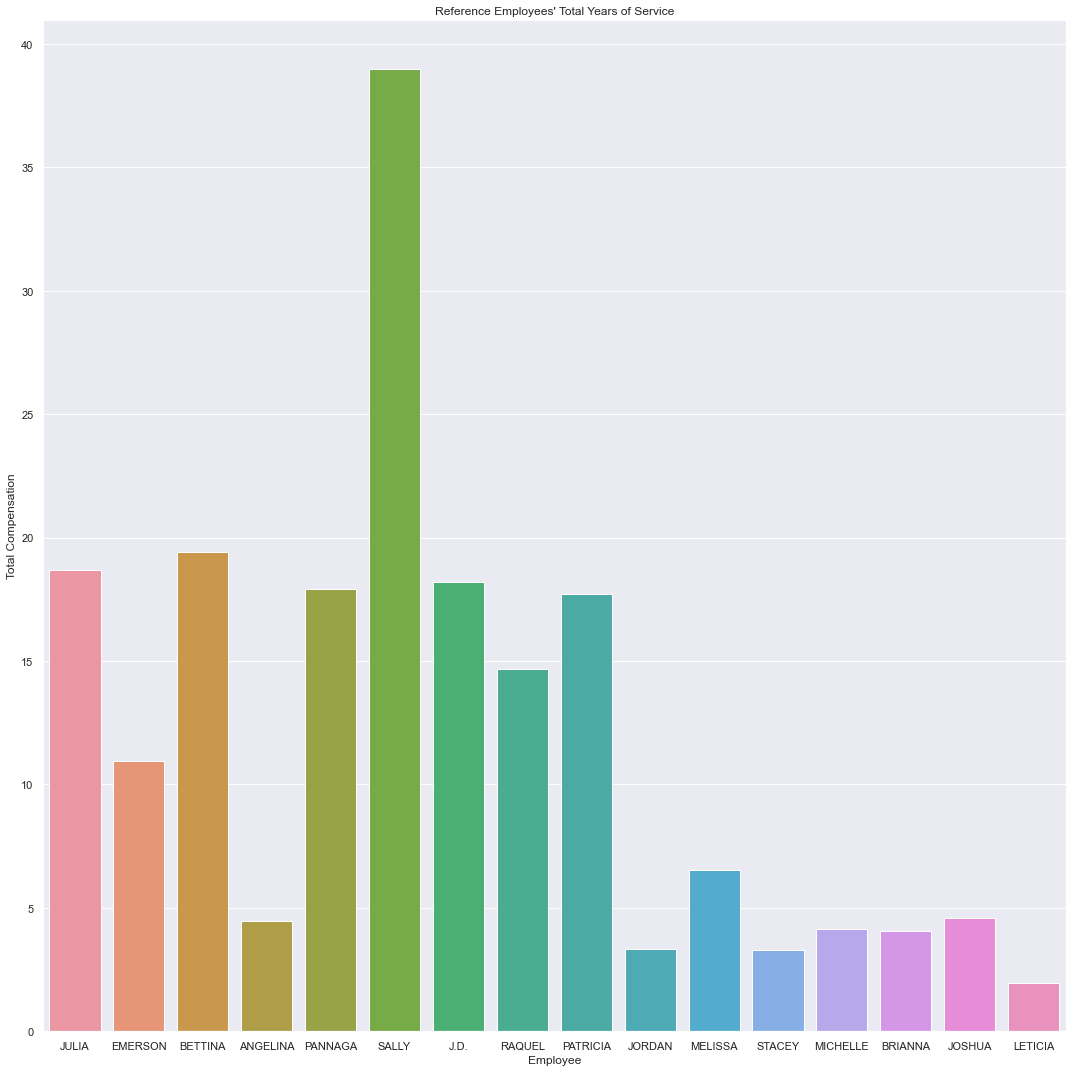

In [132]:
#set up the figure
plt.figure(figsize=(15,15))

#plot
sns.barplot(data = reference_dep[['first_name','years_service']],x='first_name',y='years_service')

#set labels and title
plt.xlabel('Employee')
plt.ylabel('Total Compensation')
plt.title("Reference Employees' Total Years of Service")

#make look nice
plt.tight_layout()
plt.savefig('9.2_Reference Employees Total Years of Service.png')

### what is the average annual salary of a librarian I? And how does each l1 compare to that average?


In [133]:
l1s = library_comp[library_comp['job_title']=='LIBRARIAN I']
l1s = pd.DataFrame(l1s).set_index('full_name')
l1s.head(2)

,first_name,middle_name,last_name,employee_category,hire_date,base_pay,leave_payout,other_pay,overtime,gross_earnings,...,gender,ethnic_orgin,employee_subgroup,withdraw_date,annual_salary,additional_benefits,business_area,years_service,withdraw_month,first_last
full_name,,,,,,,,,,,,,,,,,,,,,
DEXTER NIXON KATZMAN,DEXTER,NIXON,KATZMAN,CIVILIAN,2009-02-02,"59,371.78",734.91,600.00,0.00,"60,706.69",...,1,WHITE (NON HISPANIC OR LATINO),4A FULL-TIME,NaT,"59,371.78","21,185.81",LIBRARY,14.37,NaN,DEXTER KATZMAN
SYLVIA REYNA,SYLVIA,NaN,REYNA,CIVILIAN,2005-11-05,"53,271.40","2,048.80","1,056.82",0.00,"56,377.02",...,0,HISPANIC OR LATINO,4A FULL-TIME,NaT,"53,271.40","20,756.57",LIBRARY,17.61,NaN,SYLVIA REYNA


In [134]:
l1s[['base_pay', 'leave_payout', 'other_pay', 'overtime', 'gross_earnings',
       'total_compensation', 'annual_salary', 'additional_benefits']].mean()

base_pay              41,709.21
leave_payout             823.57
other_pay                515.81
overtime                   0.43
gross_earnings        43,049.03
total_compensation    59,593.86
annual_salary         45,505.53
additional_benefits   16,544.83
dtype: float64

In [135]:
l1s['dif_from_mean'] = l1s['annual_salary'] - l1s['annual_salary'].mean()

In [136]:
l1s['dif_from_mean']

full_name
DEXTER NIXON KATZMAN    13,866.25
SYLVIA REYNA             7,765.87
MARCO DE LEON            6,215.23
DIANA LYNN STARRETT      5,106.85
CYNTHIA M DE LEON        5,267.27
STEPHEN PAUL JACKSON     1,334.25
CONNIE HEJL              3,809.97
MARISA ANN DEBOW         2,474.35
PANNAGA PRASAD           1,334.25
PATRICIA KING            1,793.67
SALLY A BAUER            1,661.33
CYNTHIA CRUZ               825.17
ANDREW DOYLE CREWS       2,787.65
DEEDEE HAI-DUONG LU      1,306.69
LORIN FLORES               358.99
CHRISTOPHER CASTILLO    -2,758.22
KIMBERLY L KING         -4,325.43
HEATHER SWINDELL        -3,907.12
MICHAEL DUNBAR-RODNEY   -5,132.99
AMY WEAVER              -4,325.43
DACARI LAMBERT          -4,934.53
REBEKAH CORLEY          -3,845.53
VALERIE CARROLL         -5,924.69
ASHLEY MARIE STUBBS     -5,924.69
KARAH GARCIA               358.99
LORI EDDY               -4,737.27
JENNIFER MEAD BORRERO   -2,362.53
TEAGUE SHOSH            -4,934.53
KATHERINE DILLARD       -3,153.87
Name

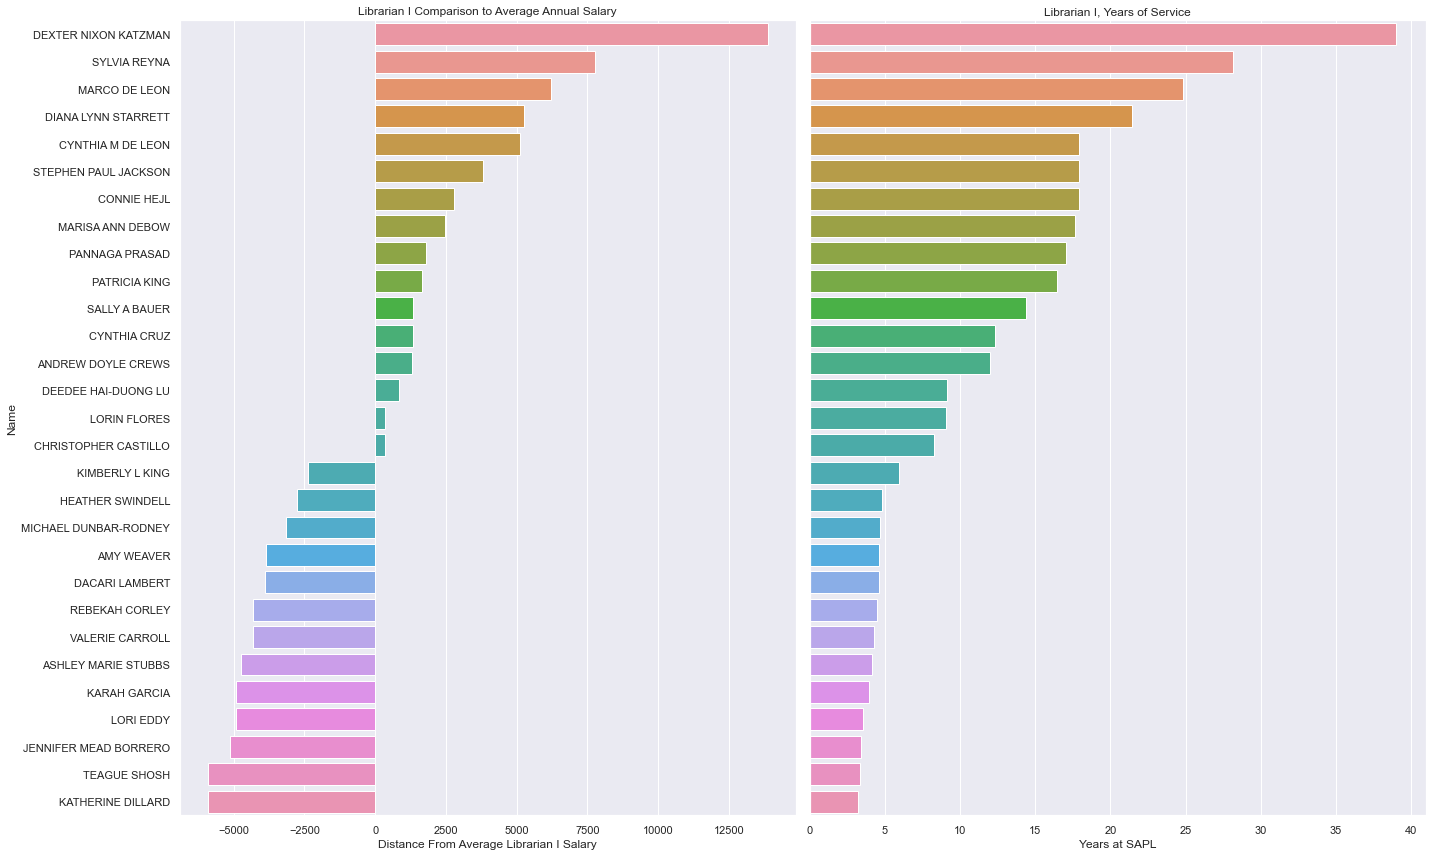

<Figure size 432x288 with 0 Axes>

In [137]:
#let's plot the l1s avg

#set up figure
plt.figure(figsize=(20,12))

#-----------------------------------set up left chart -------------------------------------------------------------------
ax1 = plt.subplot(1,2,1)


#plot

sns.barplot(data=l1s,
            y=l1s.index,
            x=l1s['dif_from_mean'].sort_values(ascending=False).values,
           )

#set up labels and title
plt.xlabel('Distance From Average Librarian I Salary')
plt.ylabel('Name')
plt.title('Librarian I Comparison to Average Annual Salary')


#-----------------------------------set up Right chart -------------------------------------------------------------------
ax2 = plt.subplot(1,2,2)

#plot
sns.barplot(data=l1s,
            y=l1s.index,
            x=l1s['years_service'].sort_values(ascending=False).values,
          )

#set up labels and title
plt.xlabel('Years at SAPL')

#remove names from Right table bc they match up
plt.yticks([])

#remove y label
plt.ylabel('')
plt.title('Librarian I, Years of Service')


#make look nice
plt.tight_layout()
plt.subplots_adjust(hspace = 0.5)

#show
plt.show()
plt.savefig('9.3_l1YearsVsSal.png')

In [138]:
#let's try to get both side by side

### What about l2s? 

In [139]:
l2s = library_comp[library_comp['job_title']=='LIBRARIAN II']
l2s = pd.DataFrame(l2s).set_index('full_name')
l2s.head(2)

,first_name,middle_name,last_name,employee_category,hire_date,base_pay,leave_payout,other_pay,overtime,gross_earnings,...,gender,ethnic_orgin,employee_subgroup,withdraw_date,annual_salary,additional_benefits,business_area,years_service,withdraw_month,first_last
full_name,,,,,,,,,,,,,,,,,,,,,
CARI RENEE RALEY,CARI,RENEE,RALEY,CIVILIAN,2002-05-28,"65,309.66","2,512.00",456.82,0.00,"68,278.48",...,0,WHITE (NON HISPANIC OR LATINO),4A FULL-TIME,NaT,"65,309.66","23,087.25",LIBRARY,21.06,NaN,CARI RALEY
GINA MARIE BRUDI,GINA,MARIE,BRUDI,CIVILIAN,1991-06-24,"65,309.67","2,512.00",456.82,0.00,"68,278.49",...,0,WHITE (NON HISPANIC OR LATINO),4A FULL-TIME,NaT,"65,309.66","22,699.94",LIBRARY,31.98,NaN,GINA BRUDI


In [140]:
l2s[['base_pay', 'leave_payout', 'other_pay', 'overtime', 'gross_earnings',
       'total_compensation', 'annual_salary', 'additional_benefits']].mean()

base_pay              49,713.16
leave_payout           1,224.27
other_pay                514.18
overtime                   0.00
gross_earnings        51,451.60
total_compensation    70,577.55
annual_salary         52,139.86
additional_benefits   19,125.95
dtype: float64

In [141]:
l2s['dif_from_mean'] = (l2s['annual_salary'].sort_values() - l2s['annual_salary'].mean())

In [142]:
l2s['dif_from_mean'].sort_values(ascending=False)

full_name
CARI RENEE RALEY              13,169.80
JULIA ANN SELWYN              13,169.80
AMY BETH ROBERTS              13,169.80
RANDI EILEEN JONES            13,169.80
IMELDA DIANE MERINO           13,169.80
GINA MARIE BRUDI              13,169.80
DEBORAH M COUNTESS            10,919.50
MARTHA LOEWEN                  8,583.14
CARRIE ANN VANCE               7,728.52
THOMAS MATTHEW DEWAELSCHE      6,779.78
RHONDA ROBERTA WOOLHOUSE       6,600.90
BENJAMIN LONGORIA              5,192.74
LILIA OLINDA PEREZ             4,903.41
KAREN JEANETTE SEBESTA         4,204.22
JANE DIANE MILLER              3,802.52
CINDY LUND MORENO              3,674.34
LESLIE A ELSASSER              3,397.70
STEPHANIE VAZQUEZ              3,385.22
MARIA LUCIA ADAMS              2,520.46
SHANNON SEGLIN                 2,233.94
JASMIN SALINAS                 2,187.66
ESPERANZA CONSUELO SONNEN      1,790.64
SETH GAMINI HALUWANA           1,672.86
CRISTIANE YAMADA-LOKENSGARD      543.37
MONTY LYNN HOLCOMB            

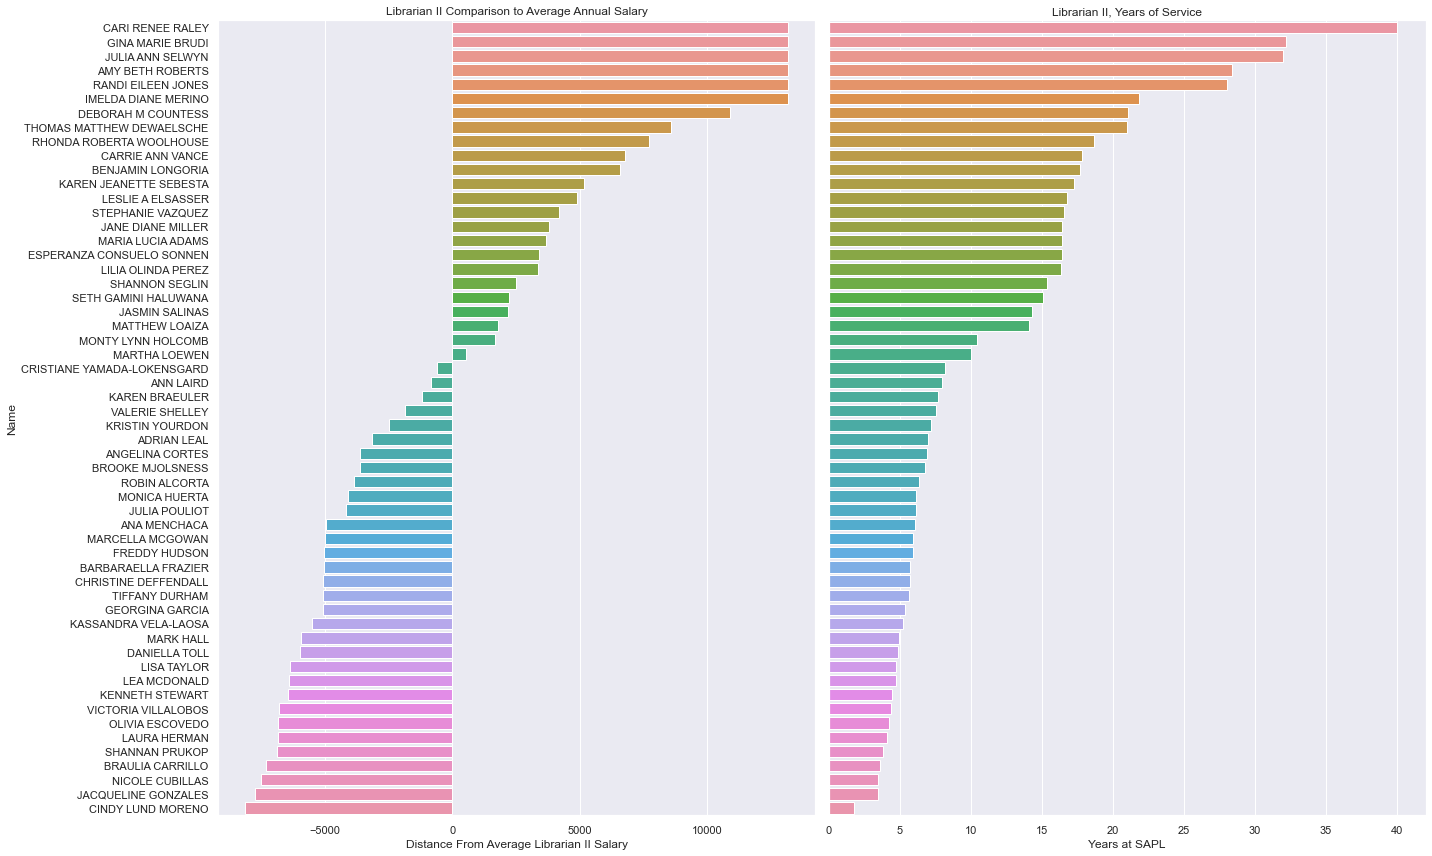

<Figure size 432x288 with 0 Axes>

In [143]:
#let's plot 

#set up figure
plt.figure(figsize=(20,12))

#-----------------------------------set up left chart -------------------------------------------------------------------
ax1 = plt.subplot(1,2,1)


#plot the l2s avg

sns.barplot(data=l1s,
            y=l2s.index,
            x=l2s['dif_from_mean'].sort_values(ascending=False).values,
           )

#set up labels and title
plt.xlabel('Distance From Average Librarian II Salary')
plt.ylabel('Name')
plt.title('Librarian II Comparison to Average Annual Salary')


#-----------------------------------set up Right chart -------------------------------------------------------------------
ax2 = plt.subplot(1,2,2)

#plot
sns.barplot(data=l1s,
            y=l2s.index,
            x=l2s['years_service'].sort_values(ascending=False).values,
          )

#set up labels and title
plt.xlabel('Years at SAPL')

#remove names from Right table bc they match up
plt.yticks([])

#remove y label
plt.ylabel('')
plt.title('Librarian II, Years of Service')


#make look nice
plt.tight_layout()
plt.subplots_adjust(hspace = 0.5)

#show
plt.show()
plt.savefig('9.4_l2YearsVsSal.png')

### What about l3s?

In [144]:
l3s = library_comp[library_comp['job_title']=='LIBRARIAN III']
l3s = pd.DataFrame(l3s).set_index('full_name')
l3s.head(2)

,first_name,middle_name,last_name,employee_category,hire_date,base_pay,leave_payout,other_pay,overtime,gross_earnings,...,gender,ethnic_orgin,employee_subgroup,withdraw_date,annual_salary,additional_benefits,business_area,years_service,withdraw_month,first_last
full_name,,,,,,,,,,,,,,,,,,,,,
KATHLEEN VIVIAN FORDYCE,KATHLEEN,VIVIAN,FORDYCE,CIVILIAN,2001-06-18,"70,566.60","2,714.40",456.82,0.00,"73,737.82",...,0,WHITE (NON HISPANIC OR LATINO),4A FULL-TIME,NaT,"70,566.60","23,665.07",LIBRARY,22.00,NaN,KATHLEEN FORDYCE
JIMMY JIMENEZ,JIMMY,NaN,JIMENEZ,CIVILIAN,1997-03-29,"70,285.80","2,703.20","1,059.56",0.00,"74,048.56",...,1,HISPANIC OR LATINO,4A FULL-TIME,NaT,"70,285.80","23,175.43",LIBRARY,26.22,NaN,JIMMY JIMENEZ


In [145]:
l3s[['base_pay', 'leave_payout', 'other_pay', 'overtime', 'gross_earnings',
       'total_compensation', 'annual_salary', 'additional_benefits']].mean()

base_pay              57,855.16
leave_payout           1,938.25
other_pay                770.93
overtime                   0.00
gross_earnings        60,564.34
total_compensation    81,742.13
annual_salary         60,740.74
additional_benefits   21,177.80
dtype: float64

In [146]:
l3s['dif_from_mean'] = l3s['annual_salary'] - l3s['annual_salary'].mean()

In [147]:
l3s['dif_from_mean']

full_name
KATHLEEN VIVIAN FORDYCE    9,825.86
JIMMY JIMENEZ              9,545.06
JEFFRY L MARTIN            8,322.54
JAMIE FLOWERS              7,209.22
JORGE CHAVEZ               5,357.50
DEBORAH LYNNE BRANTLEY     5,640.12
TRACEY LOUISE KNOUSE       4,578.54
D L TILFORD GRANT          3,639.42
CATHERINE PRAZAK           3,321.18
OSCAR ROMAN GONZALEZ         287.76
HEIDI LYNN NOVOTNY           416.72
THERESA LYNN GARZA           214.18
FRANCES M RICONDO             62.86
CRISTINE F MITCHAMORE      1,616.52
NATHANIEL LAUBNER         -1,494.80
MONICA GARZA BUSTILLO     -1,875.18
JERNELL WILLIAMS            -403.00
KATE GARRETT SIMPSON      -2,588.88
MARY SMITH NAYLOR         -1,461.78
MARIA GONZALES            -1,229.86
ARLENE JANE RICHARDSON       866.78
KIYANNA STEPHENS          -2,049.90
TIMOTHY FRANCIS JOHNSON   -3,299.20
JOSE RUIZ-ALVAREZ         -4,134.32
JEANNETTE DAVIES          -3,196.76
BARBARA E KWIATKOWSKI     -5,333.44
EMERSON STANLEY           -8,405.60
STEVEN BARRERA    

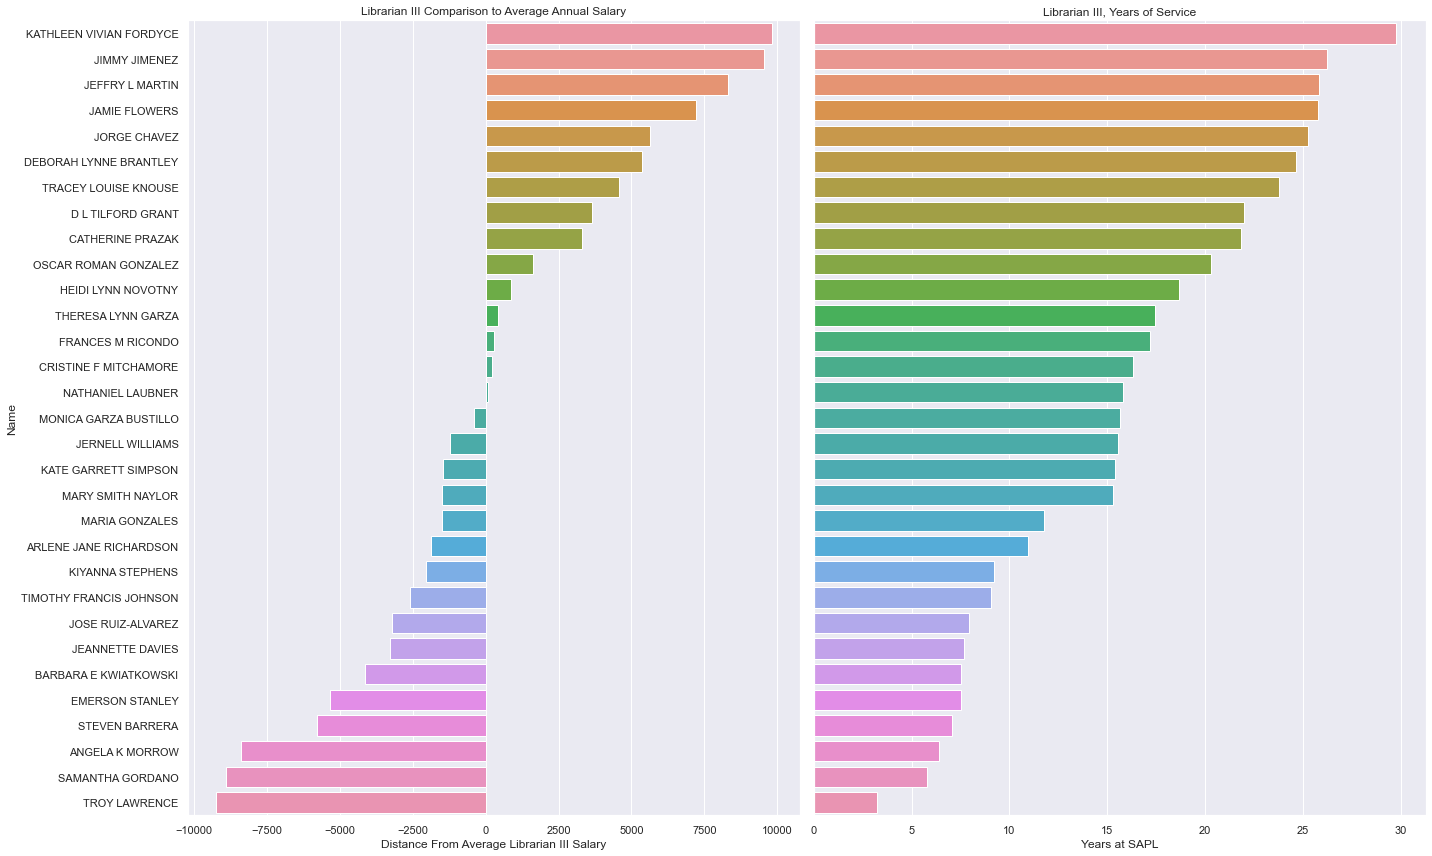

<Figure size 432x288 with 0 Axes>

In [162]:
#let's plot 

#set up figure
plt.figure(figsize=(20,12))

#-----------------------------------set up left chart -------------------------------------------------------------------
ax1 = plt.subplot(1,2,1)


#plot the l2s avg

sns.barplot(data=l1s,
            y=l3s.index,
            x=l3s['dif_from_mean'].sort_values(ascending=False).values,
           )

#set up labels and title
plt.xlabel('Distance From Average Librarian III Salary')
plt.ylabel('Name')
plt.title('Librarian III Comparison to Average Annual Salary')


#-----------------------------------set up Right chart -------------------------------------------------------------------
ax2 = plt.subplot(1,2,2)

#plot
sns.barplot(data=l1s,
            y=l3s.index,
            x=l3s['years_service'].sort_values(ascending=False).values,
          )

#set up labels and title
plt.xlabel('Years at SAPL')

#remove names from Right table bc they match up
plt.yticks([])

#remove y label
plt.ylabel('')
plt.title('Librarian III, Years of Service')


#make look nice
plt.tight_layout()
plt.subplots_adjust(hspace = 0.5)

#show
plt.show()
plt.savefig('9.5_l3YearsVsSal.png')

## Is there any correlation between annual salary and gender?

In [149]:
comp_styled = comp.style.background_gradient() #adding a gradient based on values in cell


In [150]:
#first list make our xs as vs g
as_vs_g = comp.xs(['annual_salary','gender'],axis=1)

C:\Users\dansc\AppData\Local\Temp\ipykernel_9936\2358939556.py:2: FutureWarning: Passing lists as key for xs is deprecated and will be removed in a future version. Pass key as a tuple instead.
  as_vs_g = comp.xs(['annual_salary','gender'],axis=1)


In [151]:
as_vs_g = as_vs_g.corr().style.background_gradient()
dfi.export(as_vs_g,"10_as_vs_g.png")

In [152]:
as_vs_g

,annual_salary,gender
annual_salary,1.000000,0.213651
gender,0.213651,1.000000


In [153]:
### Whats the same correlation specific to the library

In [154]:
lib_as_vs_g = library_comp.xs(['annual_salary','gender'],axis=1)

C:\Users\dansc\AppData\Local\Temp\ipykernel_9936\2059291849.py:1: FutureWarning: Passing lists as key for xs is deprecated and will be removed in a future version. Pass key as a tuple instead.
  lib_as_vs_g = library_comp.xs(['annual_salary','gender'],axis=1)


In [155]:
lib_as_vs_g = lib_as_vs_g.corr().style.background_gradient()
dfi.export(lib_as_vs_g,"11_lib_as_vs_g.png")

### Is there any correlation between years worked and total compensation?

In [156]:
ys_vs_tc = comp[['total_compensation','years_service']].corr().style.background_gradient()

In [157]:
dfi.export(ys_vs_tc,"12_ys_vs_tc.png")

In [158]:
ys_vs_tc

,total_compensation,years_service
total_compensation,1.000000,0.513635
years_service,0.513635,1.000000


### Is the correlation between years worked and total compensation differenct at the library?

In [159]:
#yes it is a little weaker.
lib_ys_vs_tc = library_comp[['total_compensation','years_service']].corr().style.background_gradient()

In [160]:
lib_ys_vs_tc

,total_compensation,years_service
total_compensation,1.000000,0.396394
years_service,0.396394,1.000000


In [161]:
dfi.export(lib_ys_vs_tc,"13_lib_ys_vs_tc.png")